# Study Questions
## Imports & Constants

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from textstat.textstat import textstat
import pprint, math

log = pprint.pprint

%matplotlib inline
%run -i tools/datajson.py
# Ensures higher quality graphs!
%config InlineBackend.figure_format = 'retina'

In [13]:
# File Names
NAMES = ['2017-10-02', '2017-10-06', '2017-10-16', '2017-10-25', '2017-11-01', 
        '2017-11-13', '2017-11-18', '2017-11-25', '2017-12-06', '2017-12-16',
        '2017-12-25', '2018-01-04', '2018-01-17']
CURRENTS = ['../private/output/' + name + '.txt' for name in NAMES]


In [14]:
def clean_question(text):
    start = text[:6].upper()
    if start == 'ELI5: ':
        return text[6:]
    start = text[:5].upper()
    if start == 'ELI5:':
        return text[5:]
    return text

## Samples Questions

Size: (1300, 3)


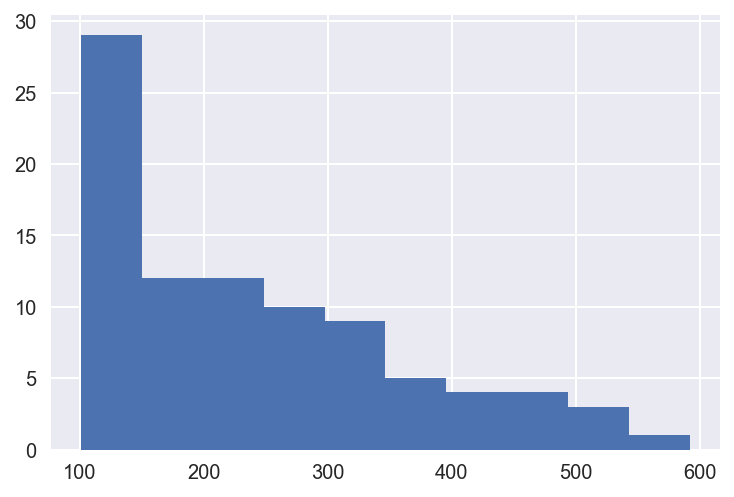

Number: 89
Average score: 240.4943820224719


In [26]:
collected_posts = RedditDataJSON.from_filenames(CURRENTS)
print('Size:', collected_posts.size)
raw_scores = {post['title']: int(post['score']) for post in collected_posts.posts}
texts_only = list(raw_scores.keys())
texts_only.sort(key=lambda post: raw_scores[post])

middle = [post for post in texts_only if 100 <= raw_scores[post] <= 600]
middle_scores = [raw_scores[post] for post in middle]

plt.hist(middle_scores)
plt.show()

average_score = sum(middle_scores) / len(middle)
cleaned = [clean_question(post) for post in middle]

print('Number:', len(cleaned))
print('Average score:', average_score)

In [29]:
w# Random Sampling
questions = list(np.random.choice(cleaned, 40, replace=False))
print(json.dumps(questions))

["What make objects 'bouncier' than others?", "Why do car windows get a grid pattern on them", "Why does shampoo not lather up well when you shampoo for the first time in a while?", "Why can't the asteroid belt accumulate into one rocky planet?", "How do such small doses of things like cocaine and heroin kill you? How do these small powders have such a big effect on your body?", "How do scientists know what the global temperature was millions of years ago?", "Why does giving someone a transfusion of my blood to someone not give them my immunity?", "How did we \"solve\" the Y2K problem? Was our solution completely thorough?", "Why is therapy effective? What is it about the brain that allows talking about your problems to help fix them?", "How does rabies induce hydrophobia?", "What causes those pulled neck muscles that happen from doing nothing like yawning or rolling in your sleep?", "FCC and net neutrality megathread.", "Why do we toss and turn/constantly reposition ourselves during o

In [17]:
high_baseline = average_score * 10
low_baseline = average_score // 10
high_baseline, low_baseline

(2941.525423728813, 29.0)